In [1]:
import dill
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from dtw import dtw, dtw_ln, accelerated_dtw
from improved_dtw import dtw_improved
from fast_dtw import fastdtw
from fast_dtw import dtw as dtw_from_fast_dtw
from testing import TestFactory


distance = lambda x, y: np.linalg.norm(x - y, ord=2)

# Тестирование

## $Len = 30$ 

In [2]:
params = {
    "nrow": 100000,
    "window_size": 10,
    "element_length": 30,
    "path": "../data/Eye-Motion/ECoG.csv",
    "overlap": 0,
    "shuffle": True,
    "sample_size": 30,
    "chanel_num": 32,
    "repeat_num": 1
}

test_params = {
    "common_dtw_l=0.3": [[dtw_ln, distance, "common_dtw_l=0.3"], {"dump_result": False, "dtw_args": {"l":0.3}}],
    "accelerated_dtw": [[accelerated_dtw, distance, "accelerated_dtw"], {"dump_result": False}],
#     "common_dtw": [[dtw, distance, "accelerated_dtw"], {"dump_result": True}],
    "fastdtw": [[fastdtw, distance, "fastdtw"], {"dump_result": False}]
}

tests = TestFactory(random_state=42, params=params)
X = tests.set_sample(500)

In [3]:
result_infos_1 = {}
for key in test_params:
    result_infos_1[key] = tests.test_dtw(*test_params[key][0], **test_params[key][1])
    
with open("../data/result_info_30", 'wb') as f:
    dill.dump(result_infos_1, f)

Elapsed time: 446.576
Elapsed time: 757.414
Elapsed time: 448.313


## $Len = 50$

In [4]:
params = {
    "nrow": 100000,
    "window_size": 10,
    "element_length": 50,
    "path": "../data/Eye-Motion/ECoG.csv",
    "overlap": 0,
    "shuffle": True,
    "sample_size": 30,
    "chanel_num": 32,
    "repeat_num": 1
}

test_params = {
    "common_dtw_l=0.2": [[dtw_ln, distance, "common_dtw_l=0.3"], {"dump_result": False, "dtw_args": {"l":0.2}}],
    "accelerated_dtw": [[accelerated_dtw, distance, "accelerated_dtw"], {"dump_result": False}],
#     "common_dtw": [[dtw, distance, "accelerated_dtw"], {"dump_result": True}],
    "fastdtw": [[fastdtw, distance, "fastdtw"], {"dump_result": False}]
}

tests = TestFactory(random_state=42, params=params)
X = tests.set_sample(500)

In [5]:
result_infos_2 = {}
for key in test_params:
    result_infos_2[key] = tests.test_dtw(*test_params[key][0], **test_params[key][1])
    
with open("../data/result_info_50", 'wb') as f:
    dill.dump(result_infos_2, f)

Elapsed time: 759.006
Elapsed time: 1996.667
Elapsed time: 829.565


## $Len = 100$

In [6]:
params = {
    "nrow": 100000,
    "window_size": 10,
    "element_length": 100,
    "path": "../data/Eye-Motion/ECoG.csv",
    "overlap": 0,
    "shuffle": True,
    "sample_size": 30,
    "chanel_num": 32,
    "repeat_num": 1
}

test_params = {
    "common_dtw_l=0.1": [[dtw_ln, distance, "common_dtw_l=0.1"], {"dump_result": False, "dtw_args": {"l":0.1}}],
    "accelerated_dtw": [[accelerated_dtw, distance, "accelerated_dtw"], {"dump_result": False}],
#     "common_dtw": [[dtw, distance, "accelerated_dtw"], {"dump_result": True}],
    "fastdtw": [[fastdtw, distance, "fastdtw"], {"dump_result": False}]
}

tests = TestFactory(random_state=42, params=params)
X = tests.set_sample(500)

In [7]:
result_infos_3 = {}
for key in test_params:
    result_infos_3[key] = tests.test_dtw(*test_params[key][0], **test_params[key][1])
    
with open("../data/result_info_100", 'wb') as f:
    dill.dump(result_infos_3, f)

Elapsed time: 1707.706
Elapsed time: 7955.101
Elapsed time: 1760.117


In [45]:
info = result_infos_2["common_dtw_l=0.2"]

In [48]:
info.cluster(100)

In [49]:
info.clusters_labels

array([ 75,  30,  30,  30,  30,  30,  64,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        58,  69,  30,  30,  30,  30,  30,  30,  30,  30,  76,  73,  30,
        30,  30,  74,  66,  30,  30,  30,  30,  22,  22,  68,  13,  13,
        13,  13,  14,  14,  14,  46,  30,  30,  25,  26,  45,  55,  86,
        87,  84,  94,  91,  43,  67,  37,  30,  30,  30,  65,  30,  63,
        42,  30,  30,  31,   3,   4,  89,  62,  85,  33,  90,  81,  30,
        36,  32,  30,  23,  23,  82,  95,  30,  30,  30,  24,  24,  24,
        15,  30,  70,  71,  52,  97,  39,  16,  30,  30,  30,  3

In [50]:
X = tests.set_sample(20)

In [60]:
info = tests.test_dtw(dtw_ln, distance, "dtw_ln", dtw_args={"l": 0.2, "zscr":True})

Elapsed time: 9.322


In [61]:
info.cluster(3)
info.clusters_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
      dtype=int32)

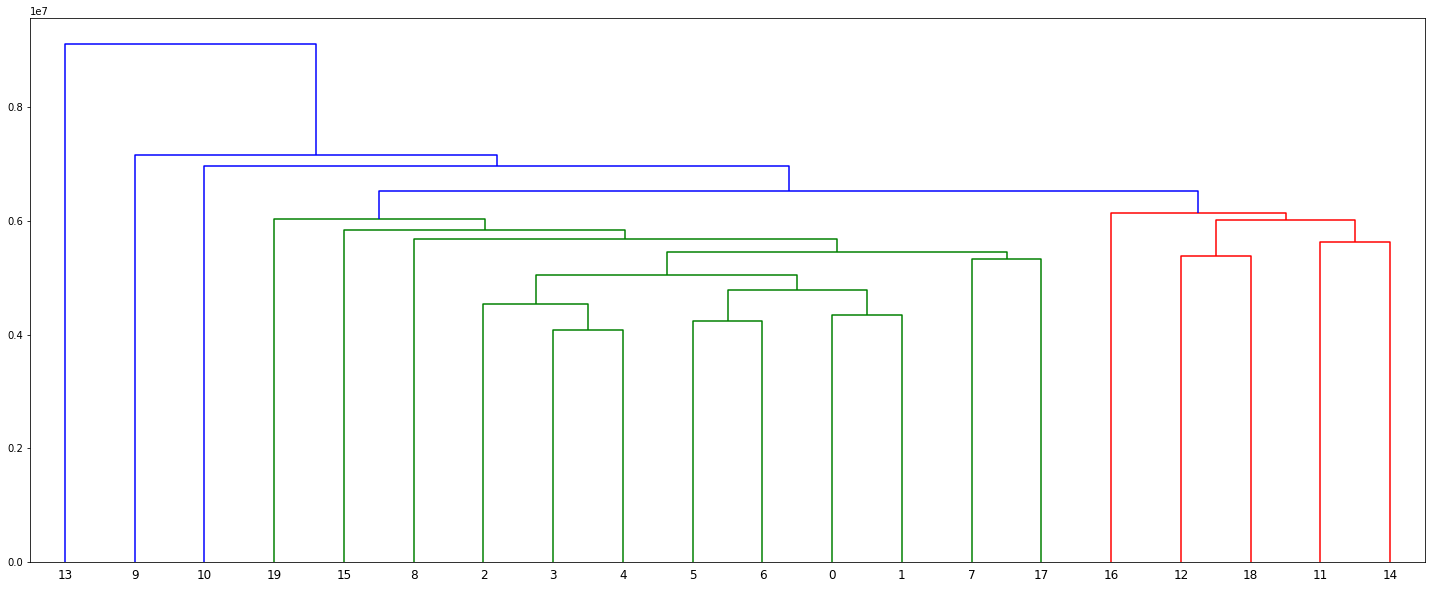

In [62]:
info.visualize()

In [ ]:
fclusterdata(X, 1.0, metric=mydist)

In [59]:
cl = linkage(X_reshaped, metric=self.dtw_dist(dtw_function, distance_function, dtw_args))

<function dtw.dtw(x, y, dist, warp=1)>

In [ ]:
shape 

In [ ]:
def dtw_dist(self, dtw_function, distance_function, dtw_args):
    return lambda x, y: (dtw_function(x.reshape(shape), y.reshape(shape), distance_function, **dtw_args)[0])